# Implementing Convolution with Strided Memory

This is a bonus notebook that shows how we can implement [convolution for image processing](https://en.wikipedia.org/wiki/Kernel_(image_processing) simply (if somewhat inefficiently) using strided memory to create "virtual" arrays against which to apply a convolution kernel.

In [1]:
from scipy.signal import convolve2d

In [2]:
import numpy as np
from matplotlib.pyplot import imshow
from numpy.lib.stride_tricks import as_strided


def extrude_for_convolution(data, kernel):
    # Indices of the top left corner of the last window.
    last_row = data.shape[0] - (kernel.shape[0])
    last_col = data.shape[1] - (kernel.shape[1])

    num_windows = last_row * data.shape[1] + last_col + 1

    shape = (num_windows,) + kernel.shape
    strides = (data.strides[1],) + data.strides

    # This is where the magic happens.
    windows = as_strided(data, shape=shape, strides=strides)
    
    # Return a mask that tells us which windows are "split" across multiple rows.
    valid = np.arange(num_windows) % data.shape[1] <= last_col

    return windows, valid


def convolve_2d(data, kernel):
    windows, valid = extrude_for_convolution(data, kernel)

    # A 1D array containing the results of multiplying each window by the
    # convolution kernel.
    multiplication_results = np.tensordot(windows, kernel)[valid]

    return multiplication_results.reshape(data.shape[0] - kernel.shape[0] + 1,
                                          data.shape[1] - kernel.shape[1] + 1)

In [3]:
image = np.load('images/horse.npy')
image.shape

(328, 400)

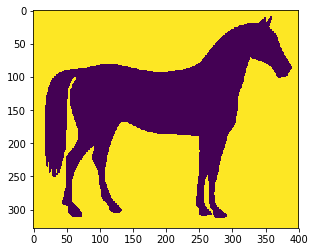

In [4]:
imshow(image)

We can convolve the image with a gaussian kernel to add a blurring effect:

In [5]:
from scipy.signal import gaussian

blur_kernel = gaussian(3, 1) + gaussian(3, 1)[:, np.newaxis]
blur_kernel /= blur_kernel.sum()
blur_kernel

array([[0.09135621, 0.12098856, 0.09135621],
       [0.12098856, 0.15062092, 0.12098856],
       [0.09135621, 0.12098856, 0.09135621]])

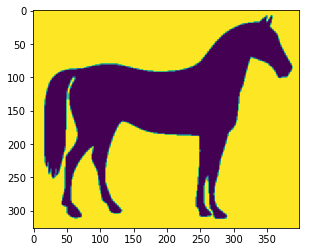

In [6]:
blurred = convolve_2d(image, blur_kernel)
imshow(blurred);

We can use other kernels to get other effects:

In [7]:
kernel = np.full((3, 3), -1)
kernel[1, 1] = 8
kernel

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

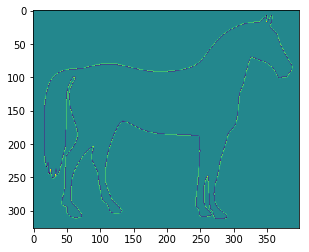

In [8]:
imshow(convolve_2d(image, kernel))